In [ ]:
#Scraping through Beautiful Soup

import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://finance.yahoo.com/quote/%5EBSESN/history/?period1=1559290291&period2=1717143080'  # Replace with URL
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table',class_='table svelte-ewueuo noDl')  # Adjust this line if the table has a specific class or id

# Extract table headers
headers = []
for header in table.find_all('th'):
    headers.append(header.text.strip())

# Extract table rows
rows = []
for row in table.find_all('tr'):
    cells = row.find_all('td')
    cells = [cell.text.strip() for cell in cells]
    if cells:  # Avoid empty rows
        rows.append(cells)

# Create DataFrame
df = pd.DataFrame(rows, columns=headers)

# Display the DataFrame
print(df)

In [7]:
pip install numpy pandas matplotlib scikit-learn tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/f9/14/67e9b2b2379cb530c0412123a674d045eca387dfcfa7db1c0028857b0a66/tensorflow-2.16.1-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2dbd0ad4182ef2d53488bb02e58694cd79d61369e85900/flatbuffers-24.3.25-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 from https://files.pythonhosted.org/packages/fa/39/5aae571

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [10]:
df=pd.read_csv('/Users/nishchalverma/Downloads/dataset/Sensex.csv')
df.head(5)

,Date,Open,High,Low,Close
0,30-May-19,39580.28,39911.92,39500.56,39831.97
1,31-May-19,39998.91,40122.34,39374.24,39714.20
2,03-Jun-19,39806.86,40308.90,39711.02,40267.62
3,04-Jun-19,40196.00,40312.07,40031.05,40083.54
4,06-Jun-19,40136.43,40159.26,39481.15,39529.72


In [11]:
df.shape

(1241, 5)

In [12]:
df['Close'].isnull().sum()

0

In [13]:
df1=df.reset_index()['Close']

In [14]:
df1.head()

0    39831.97
1    39714.20
2    40267.62
3    40083.54
4    39529.72
Name: Close, dtype: float64

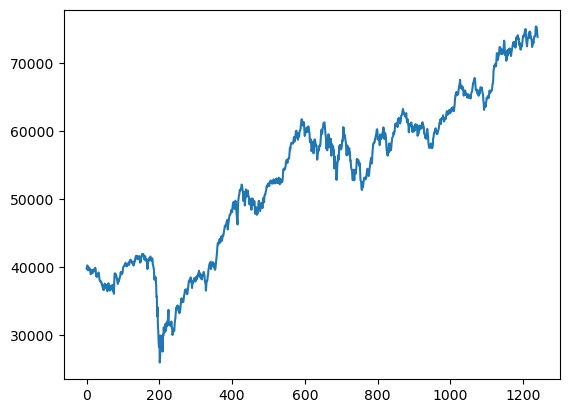

In [15]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [25]:
df1

array([[0.28017044],
       [0.27778821],
       [0.2889827 ],
       ...,
       [0.99499179],
       [0.98148869],
       [0.96900204]])

In [17]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.80)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
training_size,test_size

(992, 249)

In [26]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [27]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [28]:
print(X_train.shape), print(y_train.shape)

(891, 100)
(891,)


(None, None)

In [29]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [30]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [31]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/Users/nishchalverma/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.1172 - val_loss: 0.1049
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0119 - val_loss: 0.0184
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0038 - val_loss: 0.0051
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0020 - val_loss: 0.0041
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0015 - val_loss: 0.0034
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0017 - val_loss: 0.0026
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0015 - val_loss: 0.0039
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0013 - val_loss: 0.0045
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0013 - val_loss: 0.0035
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0011 - val_loss: 0.0037
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0012 - val_loss: 0.0040
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step

In [34]:
import tensorflow as tf
tf.__version__

'2.16.1'

In [35]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [36]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [37]:
test_predict

array([[64238.5  ],
       [63719.78 ],
       [63086.77 ],
       [62660.727],
       [62571.285],
       [62682.375],
       [62820.39 ],
       [63024.684],
       [63290.734],
       [63656.758],
       [64000.805],
       [64238.773],
       [64310.51 ],
       [64263.812],
       [64225.676],
       [64143.266],
       [64189.16 ],
       [64380.7  ],
       [64576.508],
       [64680.35 ],
       [64748.254],
       [64806.277],
       [64848.594],
       [64861.766],
       [64895.266],
       [65090.445],
       [65374.746],
       [65739.53 ],
       [66352.09 ],
       [67078.39 ],
       [67754.945],
       [68188.19 ],
       [68409.02 ],
       [68471.89 ],
       [68348.516],
       [68143.66 ],
       [68146.22 ],
       [68509.7  ],
       [68979.58 ],
       [69394.69 ],
       [69464.04 ],
       [69365.266],
       [69272.38 ],
       [69281.055],
       [69511.03 ],
       [69908.18 ],
       [70262.86 ],
       [70489.914],
       [70498.625],
       [70256.68 ],


In [38]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

50936.25380528763

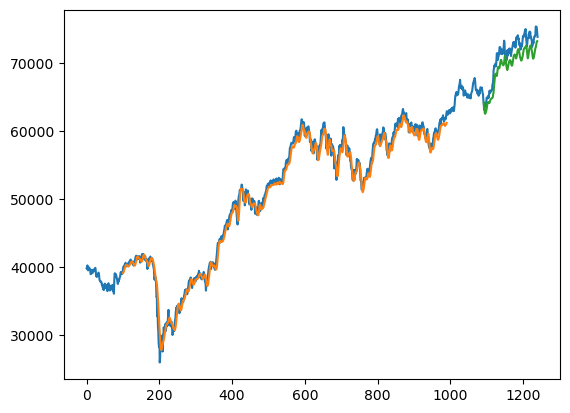

In [40]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [41]:
len(test_data)

249

In [43]:
x_input=test_data[149:].reshape(1,-1)
x_input.shape

(1, 100)

In [44]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [45]:
temp_input

[0.9277770810408443,
 0.931389369862127,
 0.9178179008350058,
 0.9184447617968803,
 0.9239366221114638,
 0.9252204835264419,
 0.9423589309987703,
 0.9577217781086156,
 0.9536929979286688,
 0.9207618616091657,
 0.9144123406045701,
 0.9244528367531879,
 0.9192020923684381,
 0.8979001472587225,
 0.9118525066347338,
 0.9045777639329409,
 0.9296784986083244,
 0.9134624409346883,
 0.9258461308175288,
 0.9236855945368634,
 0.93259252216972,
 0.9254276166742186,
 0.934624611625348,
 0.9339350443394396,
 0.919298781474529,
 0.9226780455045638,
 0.9120988818046478,
 0.9218628632921226,
 0.9272766441193607,
 0.931879490581915,
 0.9394904200919154,
 0.9451849634280538,
 0.952249336526636,
 0.9434641805294841,
 0.9542891125639203,
 0.9539767946145383,
 0.9468430400025893,
 0.9530143536798501,
 0.937027477506635,
 0.9409804032623472,
 0.9661650835005504,
 0.9673949365654735,
 0.968732806330507,
 0.964785139814875,
 0.9730554971195549,
 0.9737311071914041,
 0.9612555828856237,
 0.9645996504628134,
 0

In [47]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,100,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.94198185]
101
1 day input [0.93138937 0.9178179  0.91844476 0.92393662 0.92522048 0.94235893
 0.95772178 0.953693   0.92076186 0.91441234 0.92445284 0.91920209
 0.89790015 0.91185251 0.90457776 0.9296785  0.91346244 0.92584613
 0.92368559 0.93259252 0.92542762 0.93462461 0.93393504 0.91929878
 0.92267805 0.91209888 0.92186286 0.92727664 0.93187949 0.93949042
 0.94518496 0.95224934 0.94346418 0.95428911 0.95397679 0.94684304
 0.95301435 0.93702748 0.9409804  0.96616508 0.96739494 0.96873281
 0.96478514 0.9730555  0.97373111 0.96125558 0.96459965 0.94627181
 0.95305602 0.94387561 0.94599934 0.93110416 0.93291738 0.9438303
 0.94768877 0.94037357 0.95101362 0.96426367 0.97161042 0.96937241
 0.96882444 0.97592057 0.97633706 0.98633528 0.98514588 0.99231564
 0.9762699  0.95917495 0.94994903 0.94075163 0.95287498 0.96420844
 0.96602551 0.9683414  0.97818224 0.96585782 0.98489465 0.9810817
 0.98367754 0.96885134 0.9692031  0.96144188 0.96052232 0.9390359
 0.94430121 0.94655985 0.95320429 0.

In [48]:
len(lst_output)

30

In [49]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [50]:
import matplotlib.pyplot as plt

In [51]:
len(df1)

1241

In [52]:
lst_output

[[0.941981852054596],
 [0.9259761571884155],
 [0.9068770408630371],
 [0.8871596455574036],
 [0.8682703971862793],
 [0.8509683609008789],
 [0.835624635219574],
 [0.8223814368247986],
 [0.8112214803695679],
 [0.8020060658454895],
 [0.7945070266723633],
 [0.7884364724159241],
 [0.7834771871566772],
 [0.7793087959289551],
 [0.7756286859512329],
 [0.7721688747406006],
 [0.7687063217163086],
 [0.7650693655014038],
 [0.7611384987831116],
 [0.7568448781967163],
 [0.7521655559539795],
 [0.7471150159835815],
 [0.741738498210907],
 [0.736102283000946],
 [0.7302854657173157],
 [0.7243719100952148],
 [0.7184431552886963],
 [0.712573766708374],
 [0.7068272829055786],
 [0.7012531161308289]]

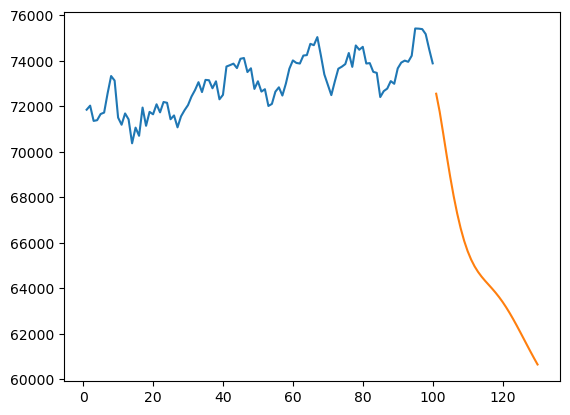

In [53]:
plt.plot(day_new,scaler.inverse_transform(df1[1141:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

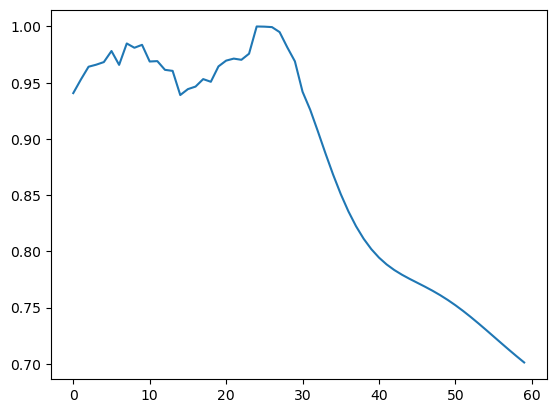

In [54]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1211:])

In [55]:
df3=scaler.inverse_transform(df3)

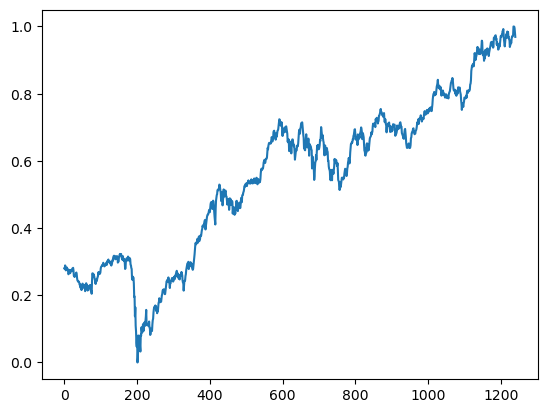

In [56]:
type(df3)
plt.plot(df1)

In [57]:
df.tail()

,Date,Open,High,Low,Close
1236,24-May-24,75335.45,75636.50,75244.22,75410.39
1237,27-May-24,75655.46,76009.68,75175.27,75390.50
1238,28-May-24,75585.40,75585.40,75083.22,75170.45
1239,29-May-24,74826.94,74986.22,74454.55,74502.90
1240,30-May-24,74365.88,74493.55,73668.73,73885.60


In [58]:
len(df3)

1271

predicted closed(stock) value of  31 May

In [59]:
df3[1241]

array([72549.80842365])

actual closed(stock) value of 31 May is 73961

percentage error

In [61]:
((72549.80-73961)/73961)*100

-1.908032611781881